# Chamadas de Emegência para 911 - Montgomery County, PA

#### 29 de Novembro, 2019 

<hr />

### Objetivo: 

   <html>   O Projeto como o dataset de Emergency-911 calls foi escolhido para fazer uma análise descritiva e agnóstica dos dados de Emergência de Montgomery, este notebook será trabalhada a fase de Análise exploratória até a fase de inferir hipóteses aos dados e extrair uma Descrição completa do dados, respondendo as principais perguntas feitas através de visualizações.  

### Sobre: 
  Criado pelo Congresso em 2004 como Escritório de Implementação e Coordenação 911 (ICO), o Programa Nacional 911 está alojado na Administração Nacional de Segurança no Trânsito de Rodovias do Departamento de Transporte dos EUA e é um programa conjunto com a Administração Nacional de Telecomunicações e Informação do Departamento do comércio.

### Montgomery Country: 

  O Condado de Montgomery, também conhecido localmente como Montco, é um condado localizado na Comunidade da Pensilvânia. Até o censo de 2010, a população era de 799.874 habitantes, tornando-o o terceiro município mais populoso da Pensilvânia, depois dos condados de Filadélfia e Allegheny. A sede do condado é Norristown. O Condado de Montgomery é muito diversificado, variando de fazendas e terrenos abertos em Upper Hanover a ruas densamente povoadas de casas geminadas em Cheltenham

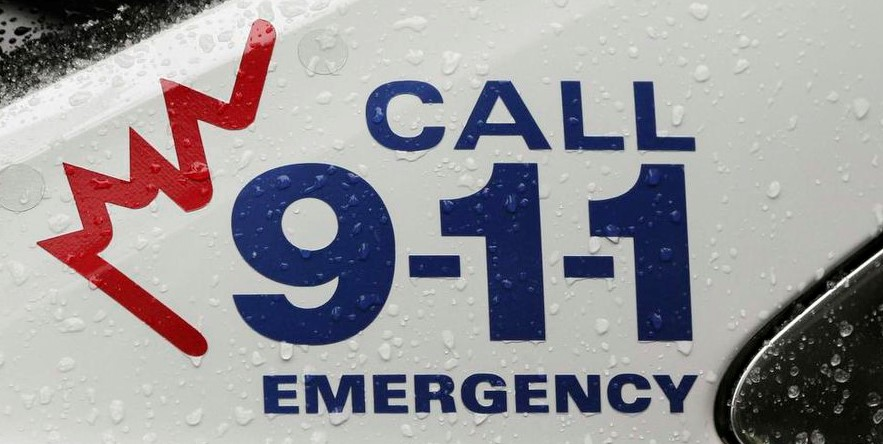

### Para este projeto principal, analisaremos alguns dados de 911 chamadas do Kaggle. Os dados contêm os seguintes campos:


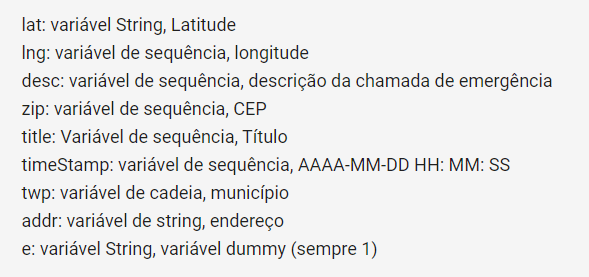

### Importando pacotes 

In [383]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

In [384]:
# Verificar diretório 
os.getcwd()

'C:\\Users\\Marcello\\Documents\\Felipe-Estudos\\DS_estudos'

### Carregando dataset 

In [385]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


### 1. Qualidade das Variáveis 

 
 
 

In [386]:
# Tipo de dados 
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [387]:
# Podemos ver que o tipo de dados da coluna timeStamp com o tipo de dado Object, devemos transfoma-lá em tipo de dado date

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [388]:
# Apagando coluna 'e'
df = df.drop('e', axis=1)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 8 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 25.9+ MB


In [390]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


### 2. Limpeza de dados 

In [391]:
# Separar título e tipo de emergência 

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
423879    Traffic
423880    Traffic
423881    Traffic
423882    Traffic
423883        EMS
423884       Fire
423885    Traffic
423886    Traffic
423887        EMS
423888       Fire
423889    Traffic
423890       Fire
423891    Traffic
423892       Fire
423893       Fire
423894        EMS
423895        EMS
423896    Traffic
423897    Traffic
423898    Traffic
423899    Traffic
423900    Traffic
423901        EMS
423902    Traffic
423903    

In [392]:
# Agora dividindo o Subtitulo da emergência do título.

df['title'] = df['title'].apply(lambda titulo: titulo.split(':')[1])
df['title'] = df['title'].rename(columns = {'title':'Subtype'})

# Renomeando coluna após separar os dados
df.rename(columns={'title':'Subtype'}, inplace=True)

In [393]:
# Principais chamadas de emergência 
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

In [394]:
# Sepaando a coluna timeStamp por dia, mês, ano e dia da semana 

df['timeStamp'].head()

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)

In [395]:
# Criando uma coluna de Dia/Noite para filtrar melhor a análise 

df["day/night"] = df["timeStamp"].apply(lambda x : "night" if int(x.strftime("%H")) > 19 else "day")

In [396]:
# Verificando coluna 'Day of Week'

df['Day of Week'].value_counts()

4    65751
2    63423
3    63159
1    63041
0    61318
5    57093
6    50124
Name: Day of Week, dtype: int64

In [397]:
# Tratando os dias da semana: Transformando em Strings 

# Atribuindo Dias da semana 
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

# Aplicando dias da semana como String 
df['Day of Week'] = df['Day of Week'].map(dmap)

# Verificando mudança 
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
5         Thu
6         Thu
7         Thu
8         Thu
9         Thu
10        Thu
11        Thu
12        Thu
13        Thu
14        Thu
15        Thu
16        Thu
17        Thu
18        Thu
19        Thu
20        Thu
21        Thu
22        Thu
23        Thu
24        Thu
25        Thu
26        Thu
27        Thu
28        Thu
29        Thu
         ... 
423879    Fri
423880    Fri
423881    Fri
423882    Fri
423883    Fri
423884    Fri
423885    Fri
423886    Fri
423887    Fri
423888    Fri
423889    Fri
423890    Fri
423891    Fri
423892    Fri
423893    Fri
423894    Fri
423895    Fri
423896    Fri
423897    Fri
423898    Fri
423899    Fri
423900    Fri
423901    Fri
423902    Fri
423903    Fri
423904    Fri
423905    Fri
423906    Fri
423907    Fri
423908    Fri
Name: Day of Week, Length: 423909, dtype: object

### 3. Visualizações de dados 

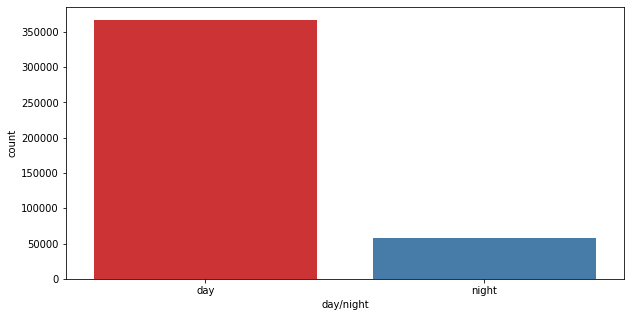

In [398]:
# Plotando contagem de chamadas de dia/noite 
fig, axe = plt.subplots(figsize=(10,5))
sns.countplot(x='day/night', data=df, palette='Set1')

In [399]:
print('Contagem de chamadas feita de Dia:',df['day/night'][df['day/night']== 'day'].count())
print('Contagem de chamadas feita de Noite:',df['day/night'][df['day/night']== 'night'].count())

Contagem de chamadas feita de Dia: 366797
Contagem de chamadas feita de Noite: 57112


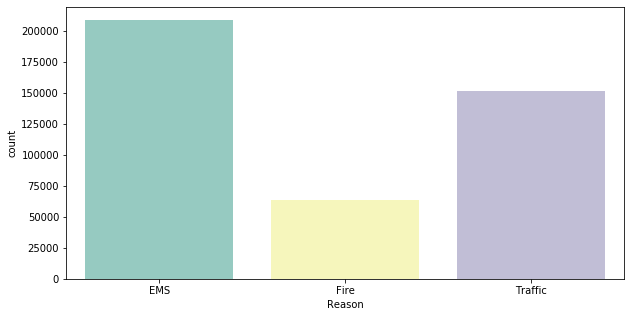

In [400]:
# Plotando Razões das chamadas 
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x='Reason', data=df, palette='Set3')

<html> Podemos ver que mais da metade são chamadas de EMS, seguido de Traffic e por último Fire 

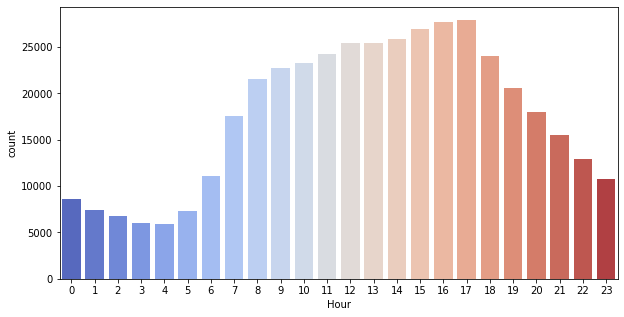

In [401]:
# Plotando Horário com mais chamadas 
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='coolwarm')

<html> A Frequência mostrada no gráfico nos diz que entre 12 horas e 17 horas é onde o pico de chamadas de emergênia é maior.

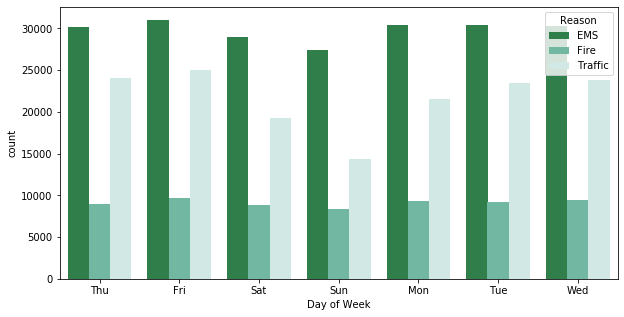

In [402]:
# Gráfico da Quantidade de emergências por Razões 
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='BuGn_r')

<html> Vemos que em todos os dias da semana a principal razão é EMS que apresenta ser predominante no nosso conjunto de dados 

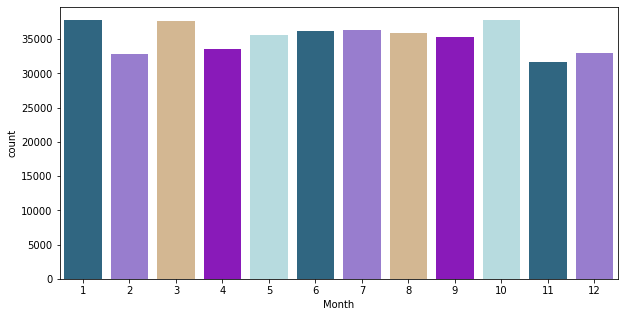

In [403]:
# Gráfico de quantidade de chamadas por Mês 

# Criando paleta de cor 
colors = ["#236B8E", "#9370DB", "#DEB887", "#9400D3", "#B0E0E6"]
# Quantidade de chamadas por Mês 
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x='Month', data=df, palette=colors)

<html> Através do gráfico podemos ver que os meses possuem uma média relativamente próxima um do outro, com os npumeros de chamadas parcialmente próximos entre as classes dos meses. 

In [404]:
# Contagem do mês 
print('Classificação dos Meses com mais Chamadas')
df['Month'].value_counts().sort_values(ascending=False)

Classificação dos Meses com mais Chamadas


1     37824
10    37815
3     37666
7     36405
6     36171
8     35972
5     35644
9     35339
4     33583
12    33019
2     32828
11    31643
Name: Month, dtype: int64

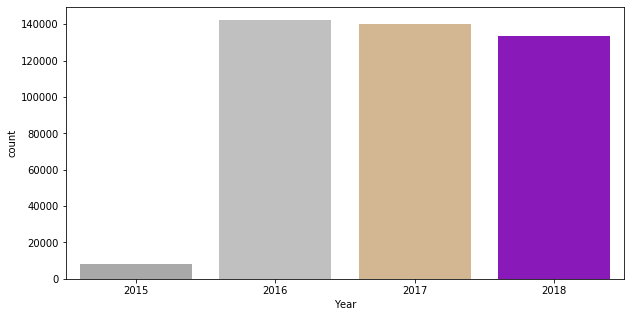

In [459]:
# Anos com mais chamadas 
colors2 = ["#A9A9A9", "#C0C0C0", "#DEB887", "#9400D3", "#D8BFD8"]

plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=df, palette=colors2)

In [406]:
print('Anos com mais chamadas de emergências')
df['Year'].value_counts(ascending=False)

Anos com mais chamadas de emergências


2016    142360
2017    140343
2018    133290
2015      7916
Name: Year, dtype: int64

In [460]:
df['Subtype'].nunique()

92

In [461]:
df['Subtype'].value_counts().head(11)

 VEHICLE ACCIDENT -           98401
 DISABLED VEHICLE -           31871
 FIRE ALARM                   24459
 VEHICLE ACCIDENT             24081
 FALL VICTIM                  21258
 RESPIRATORY EMERGENCY        21159
 CARDIAC EMERGENCY            20620
 ROAD OBSTRUCTION -           14134
 SUBJECT IN PAIN              12004
 HEAD INJURY                  11105
 UNKNOWN MEDICAL EMERGENCY     7171
Name: Subtype, dtype: int64

Text(0.5, 1.0, 'Townships with Most 911 Calls')

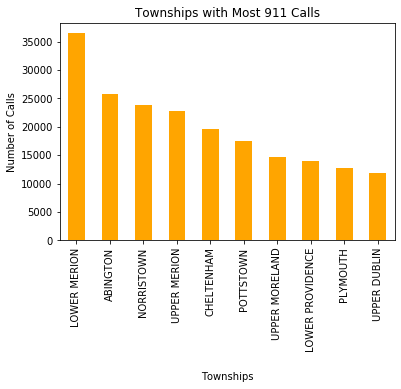

In [515]:
df['twp'].value_counts().head(10).plot.bar(color = 'orange')
plt.xlabel('Townships', labelpad = 20)
plt.ylabel('Number of Calls')
plt.title('Townships with Most 911 Calls')

In [492]:
# Fazendo mais uma transformção nos dados, agrupando em uma variável as features.
# Dias da semana e horas por Razão de emergência.

dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


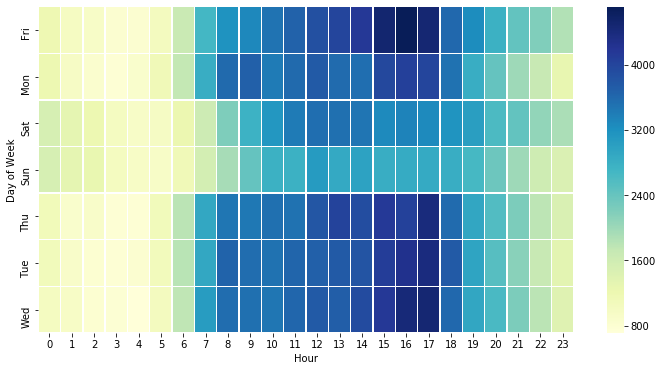

In [509]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='YlGnBu', lw=0.4)

<html> O Mapa de calor apresenta uma análise de correlção entre as variáveis, foi inserido no gráfico duas possíveis variáveis com correlações fortes e de extremo valor de análise, vemos que tem uma relação muito forte de horário com dias da semana, 17h é o horário que apresenta um alto valor de correleção com quase todos os dias da semana, e chamadas feitas de madrugada tem um percentual mais baixo como é mostrado neste gráfico.